In [6]:
import jieba
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [7]:
# 导入wordcloud库，并定义两个函数
from wordcloud import (WordCloud, get_single_color_func)

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [8]:
# 导入imageio库中的imread函数，并用这个函数读取本地图片，作为词云形状图片
import imageio
mk = imageio.imread("picture/chinamap.png")

w = WordCloud(width=1000,
              height=700,
              background_color='white',
              font_path='msyh.ttc',
              mask=mk,
              scale=5,
              max_font_size=60,
              max_words=20000,
              font_step=1)

import jieba
# 对来自外部文件的文本进行中文分词，得到string
f = open('words/三国演义.txt',encoding='utf-8')
txt = f.read()
txtlist = jieba.lcut(txt)
string = " ".join(txtlist)

# 将string变量传入w的generate()方法，给词云输入文字
w.generate(string)

# 创建字典，按人物所在的不同阵营安排不同颜色，绿色是蜀国，橙色是魏国，紫色是东吴，粉色是诸侯群雄

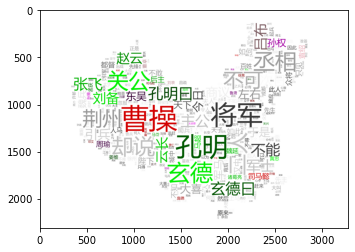

In [9]:

color_to_words = {
    'green': ['刘备','刘玄德','孔明','诸葛孔明', '玄德', '关公', '玄德曰','孔明曰',
              '张飞', '赵云','后主', '黄忠', '马超', '姜维', '魏延', '孟获',
              '关兴','诸葛亮','云长','孟达','庞统','廖化','马岱'],
    'red': ['曹操', '司马懿', '夏侯', '荀彧', '郭嘉','邓艾','许褚',
            '徐晃','许诸','曹仁','司马昭','庞德','于禁','夏侯渊','曹真','钟会'],
    'purple':['孙权','周瑜','东吴','孙策','吕蒙','陆逊','鲁肃','黄盖','太史慈'],
    'pink':['董卓','袁术','袁绍','吕布','刘璋','刘表','貂蝉']
}

# 其它词语的颜色
default_color = 'gray'

# 构建新的颜色规则
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# 按照新的颜色规则重新绘制词云颜色
w.recolor(color_func=grouped_color_func)

# 将词云图片导出到当前文件夹
w.to_file('WordClouds/output13-threekingdoms.png')
img=Image.open("WordClouds/output13-threekingdoms.png")
m=np.asarray(img)
plt.imshow(m)